### ***TP2 : Classification avec des réseaux de neurones entièrement connectés***
réalisé par :
Achraf Habib

## I.Classification Binaire

# 1.Dataset

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
X,y = datasets.make_circles (n_samples = 1000, random_state=41, noise=0.03)
display(X[:5])
display(y[:5])

array([[-0.9187073 ,  0.36570492],
       [ 0.79446081,  0.18421773],
       [-0.3596275 , -0.69222213],
       [ 0.98231765, -0.19947534],
       [-0.46158817,  0.70624664]])

array([0, 1, 1, 0, 1])

In [ ]:
X.shape

(1000, 2)

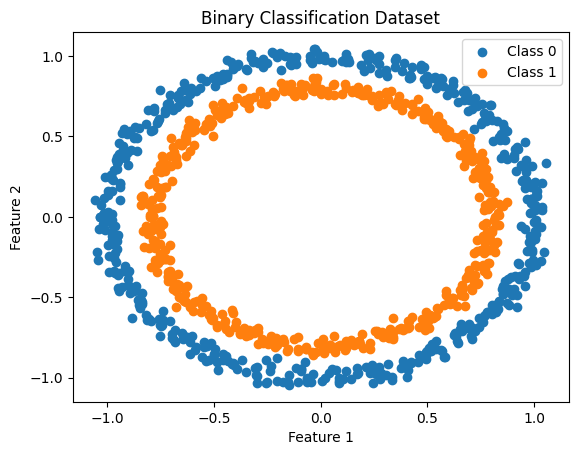

In [ ]:
import matplotlib.pyplot as plt

# Visualiser les données
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1")
plt.title("Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle = True, random_state= 42)
# Afficher les tailles des ensembles d'apprentissage et de test
print(f"Taille de l'ensemble d'apprentissage : {len(x_train)} échantillons")
print(f"Taille de l'ensemble de test : {len(x_test)} échantillons")

Taille de l'ensemble d'apprentissage : 800 échantillons
Taille de l'ensemble de test : 200 échantillons


# 2.Définition du modèle

***2.2 Définition du modèle FCNN :***

In [ ]:
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Vérifier si le modèle existe déjà
if 'model' in locals():
    K.clear_session()  # Effacer le modèle précédent et réinitialiser le backend

# Créer un nouveau modèle
model = Sequential()

# Ajout d'une couche entièrement connectée avec 100 neurones cachés
model.add(Dense(100, input_shape=(2,), activation='relu'))

# Ajout d'une couche de sortie avec une activation sigmoïde pour la classification binaire
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***2.3 Compilation du modèle:***

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Compiler le modèle
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

***2.4 Entrainement du modèle***

In [ ]:
from keras.callbacks import LambdaCallback

# Fonction pour imprimer la perte et l'exactitude tous les 10 epochs
print_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs:
        print(f"Epoch {epoch}: Loss {logs['loss']:.4f}, Accuracy {logs['accuracy']:.4f}, "
              f"Test Loss {logs['val_loss']:.4f}, Test Accuracy {logs['val_accuracy']:.4f}")
        if (epoch + 1) % 10 == 0 else None
)

# Entraînement du modèle
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    verbose=0, # Ceci empêche Keras d'imprimer les résultats pour chaque époque
    callbacks=[print_callback]
)


Epoch 9: Loss 0.6906, Accuracy 0.5050, Test Loss 0.6947, Test Accuracy 0.4850
Epoch 19: Loss 0.6876, Accuracy 0.5150, Test Loss 0.6922, Test Accuracy 0.4800
Epoch 29: Loss 0.6847, Accuracy 0.5337, Test Loss 0.6897, Test Accuracy 0.4750
Epoch 39: Loss 0.6819, Accuracy 0.5325, Test Loss 0.6872, Test Accuracy 0.4700
Epoch 49: Loss 0.6792, Accuracy 0.5487, Test Loss 0.6848, Test Accuracy 0.4850
Epoch 59: Loss 0.6764, Accuracy 0.5738, Test Loss 0.6822, Test Accuracy 0.5000
Epoch 69: Loss 0.6736, Accuracy 0.5875, Test Loss 0.6798, Test Accuracy 0.5050
Epoch 79: Loss 0.6707, Accuracy 0.6062, Test Loss 0.6772, Test Accuracy 0.5450
Epoch 89: Loss 0.6679, Accuracy 0.6313, Test Loss 0.6746, Test Accuracy 0.5700
Epoch 99: Loss 0.6649, Accuracy 0.6538, Test Loss 0.6717, Test Accuracy 0.5800


***2.5 Evaluation du modèle***

1.Tracer la (les) frontière(s) de décision : On trace les frontières où le modèle sépare les classes :

5241/5241 [==============================] - 8s 1ms/step


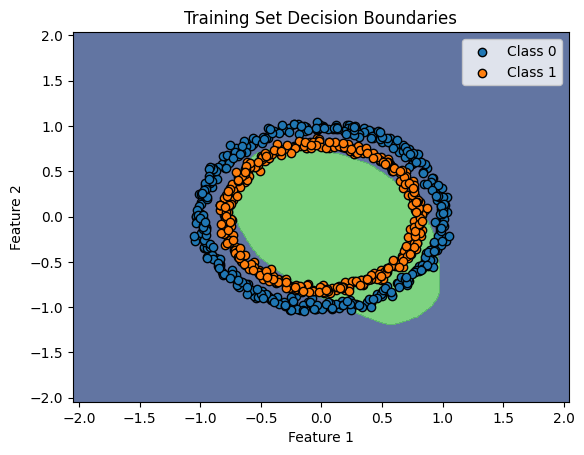

5253/5253 [==============================] - 8s 1ms/step


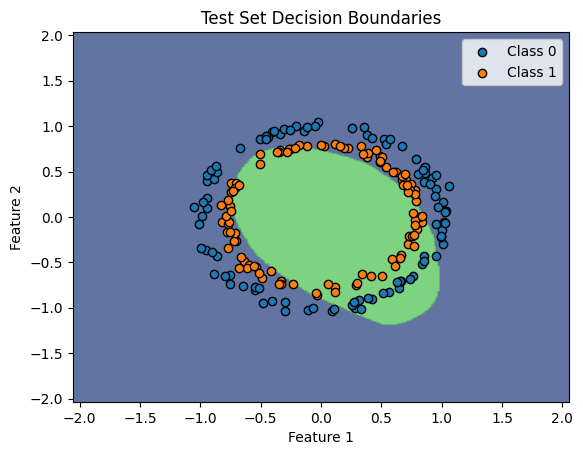

In [ ]:
def plot_decision_boundaries(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Plot for training data
plot_decision_boundaries(model, x_train, y_train, "Training Set Decision Boundaries")

# Plot for test data
plot_decision_boundaries(model, x_test, y_test, "Test Set Decision Boundaries")


2.Quel est le problème de ce modèle ? Le modèle présenté a plusieurs faiblesses

**Complexité limitée :** Avec une seule couche cachée, il peut avoir des difficultés à capturer des relations complexes.

**Sur-apprentissage :** Le modèle peut sur-apprendre (overfit) en raison d'un nombre élevé de neurones.

**Manque de régularisation :** Absence de régularisation pour réduire le sur-apprentissage.


3.Comment améliorer les performances du modèle ? Trois techniques pour améliorer ce modèle :

**Complexité du Modèle:** Ajouter davantage de neurones par couche et augmenter le nombre de couches cachées pour capturer des relations plus complexes dans les données.

**Nombre d'Itérations :**  Faire plus d'itérations pour permettre au modèle d'apprendre davantage.

**Hyperparamètres :** Ajuster le taux d'apprentissage et utiliser un optimiseur comme Adam pour une convergence plus rapide et efficace.

1. Ajouter des couches cachées supplémentaires


Epoch 10: Loss 0.0276, Accuracy 0.9987, Test Loss 0.0242, Test Accuracy 0.9950
Epoch 20: Loss 0.0103, Accuracy 0.9950, Test Loss 0.0052, Test Accuracy 1.0000
Epoch 30: Loss 0.0017, Accuracy 1.0000, Test Loss 0.0018, Test Accuracy 1.0000
Epoch 40: Loss 0.0020, Accuracy 1.0000, Test Loss 0.0083, Test Accuracy 0.9950
Epoch 50: Loss 0.0007, Accuracy 1.0000, Test Loss 0.0024, Test Accuracy 1.0000
Epoch 60: Loss 0.0006, Accuracy 1.0000, Test Loss 0.0019, Test Accuracy 1.0000
Epoch 70: Loss 0.0005, Accuracy 1.0000, Test Loss 0.0014, Test Accuracy 1.0000
Epoch 80: Loss 0.0004, Accuracy 1.0000, Test Loss 0.0016, Test Accuracy 1.0000
Epoch 90: Loss 0.0005, Accuracy 1.0000, Test Loss 0.0007, Test Accuracy 1.0000
Epoch 100: Loss 0.0006, Accuracy 1.0000, Test Loss 0.0047, Test Accuracy 0.9950
Epoch 110: Loss 0.0004, Accuracy 1.0000, Test Loss 0.0032, Test Accuracy 1.0000
Epoch 120: Loss 0.0003, Accuracy 1.0000, Test Loss 0.0026, Test Accuracy 1.0000
Epoch 130: Loss 0.0002, Accuracy 1.0000, Test Los

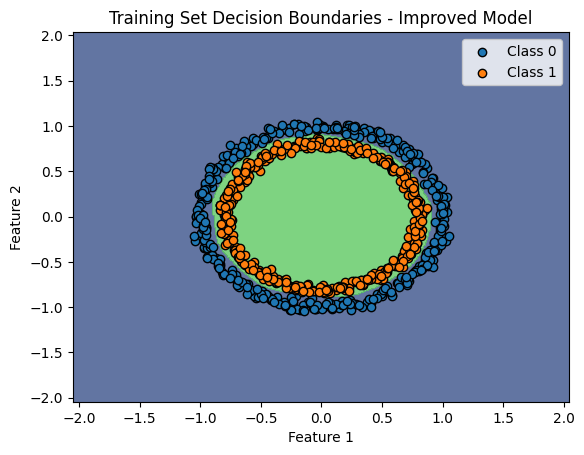

5253/5253 [==============================] - 10s 2ms/step


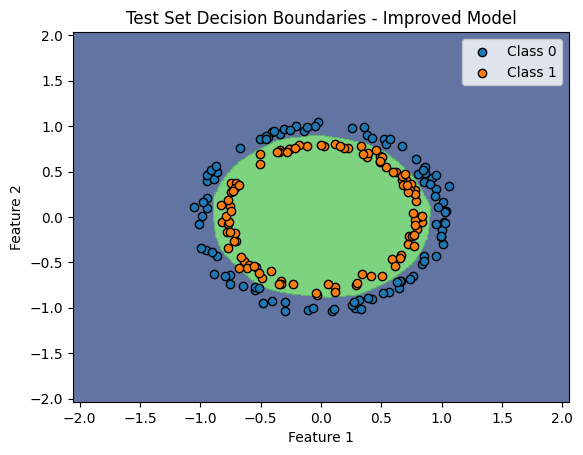

In [ ]:
import numpy as np
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import LambdaCallback

# Vérifier si le modèle existe déjà
if 'model' in locals():
    K.clear_session()  # Effacer le modèle précédent et réinitialiser le backend

# Créer un modèle plus complexe
model = Sequential([
   Dense(256, input_shape=(2,), activation='relu'),  # Ajoutez plus de neurones
   Dense(128, activation='relu'),  # Ajoutez plus de couches
   Dense(64, activation='relu'),
   Dense(1, activation='sigmoid')
])

# Ajuster les hyperparamètres
optimizer = Adam(learning_rate=0.001)  # Changez l'optimiseur et le taux d'apprentissage

# Compiler le modèle
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Fonction pour imprimer la perte et l'exactitude tous les 10 epochs
print_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs:
        print(f"Epoch {epoch + 1}: Loss {logs['loss']:.4f}, Accuracy {logs['accuracy']:.4f}, "
              f"Test Loss {logs['val_loss']:.4f}, Test Accuracy {logs['val_accuracy']:.4f}")
        if (epoch + 1) % 10 == 0 else None
)

# Entraîner le modèle avec plus d'époques
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=200,  # Augmentez le nombre d'époques
    batch_size=32,
    verbose=0,  # Ceci empêche Keras d'imprimer les résultats pour chaque époque
    callbacks=[print_callback]
)

# Fonction de tracé mise à jour
def plot_decision_boundaries(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Plot for training data
plot_decision_boundaries(model, x_train, y_train, "Training Set Decision Boundaries - Improved Model")

# Plot for test data
plot_decision_boundaries(model, x_test, y_test, "Test Set Decision Boundaries - Improved Model")


## II.La multi-Classification :

***1.Créer des données multi-classes avec make-blobs().***

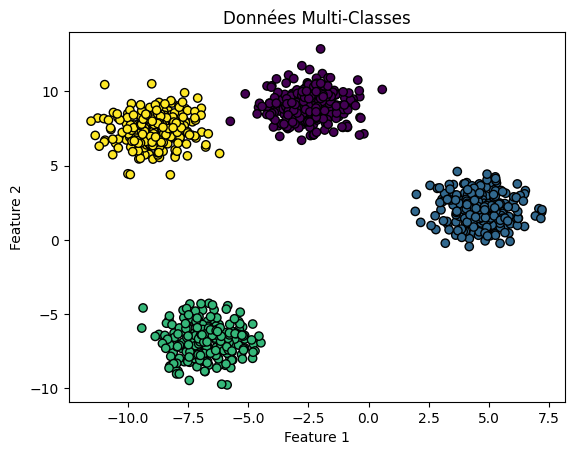

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Générer les données avec 4 classes, 2 features et 1000 échantillons
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)

# Visualiser les données
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Données Multi-Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


2. Diviser les données en ensembles d’apprentissage et de test

In [ ]:




x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)


# Afficher les tailles des ensembles d'apprentissage et de test
print(f"Taille de l'ensemble d'apprentissage : {len(x_train)} échantillons")
print(f"Taille de l'ensemble de test : {len(x_test)} échantillons")




Taille de l'ensemble d'apprentissage : 800 échantillons
Taille de l'ensemble de test : 200 échantillons


3.Visualiser les données.

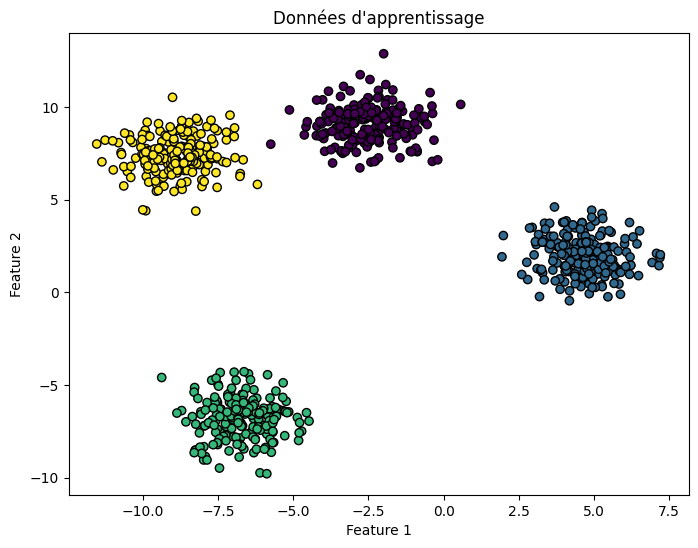

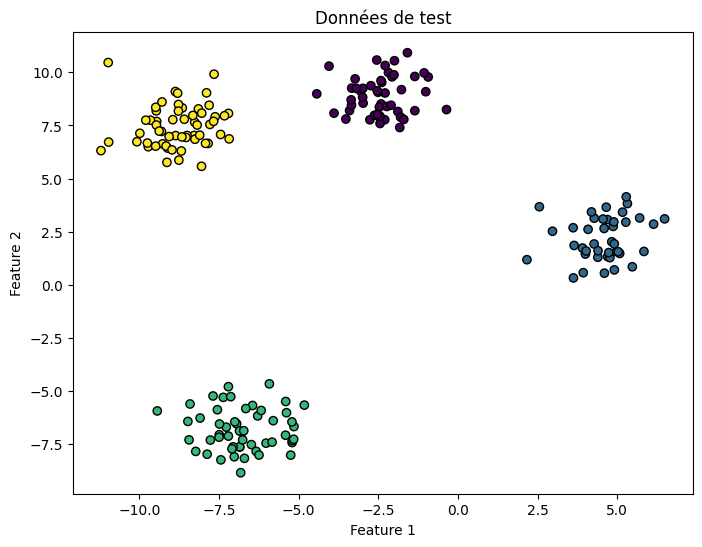

In [ ]:
# Visualiser les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title("Données d'apprentissage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Visualiser les données de test
plt.figure(figsize=(8, 6))
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='viridis', edgecolor='k')
plt.title("Données de test")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


4.Ce dataset nécessite une fonction linéaire ou non linéaire pour séparer ses classes ?
Justifier.

Un modèle avec une activation non linéaire (comme ReLU ou Sigmoid) et plusieurs couches est capable de créer des frontières de décision non linéaires qui peuvent mieux séparer les classes dans ce type de données.

5.Ce dataset nécessite une fonction linéaire ou non linéaire pour séparer ses classes ?
Justifier.

In [ ]:
# Nombre de features pour la couche d'entrée
input_shape = (2,)  # Puisque vous avez 2 features dans make_blobs
# Nombre de classes pour la couche de sortie
num_classes = 4

# Créer le modèle séquentiel
model = Sequential()

# Couche d'entrée et première couche cachée
model.add(Dense(64, input_shape=input_shape, activation='relu'))

# Ajout de quelques couches cachées supplémentaires
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

# Couche de sortie avec activation softmax pour la classification multi-classe
model.add(Dense(num_classes, activation='softmax'))

# Compilation du modèle
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Affichage du résumé du modèle
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                192       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                                 
Total params: 8772 (34.27 KB)
Trainable params: 8772 (34.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


6.Entrainer le modèle et afficher les mesures de progression toutes les 10 époques, y
compris la perte, la précision, la perte de test et la précision de test.

In [ ]:
from keras.callbacks import LambdaCallback

# Créez un rappel qui imprime les mesures toutes les 10 époques
progress_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs:
        print(f"Epoch {epoch+1}: "
              f"Loss {logs['loss']:.4f}, "
              f"Accuracy {logs['accuracy']:.4f}, "
              f"Validation Loss {logs['val_loss']:.4f}, "
              f"Validation Accuracy {logs['val_accuracy']:.4f}")
        if (epoch + 1) % 10 == 0 else None
)

# Entraîner le modèle
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    callbacks=[progress_callback],
    verbose=0  # Le rappel s'occupera de l'impression des métriques
)


Epoch 10: Loss 0.0034, Accuracy 0.9987, Validation Loss 0.0011, Validation Accuracy 1.0000
Epoch 20: Loss 0.0036, Accuracy 0.9987, Validation Loss 0.0021, Validation Accuracy 1.0000
Epoch 30: Loss 0.0017, Accuracy 0.9987, Validation Loss 0.0005, Validation Accuracy 1.0000
Epoch 40: Loss 0.0044, Accuracy 0.9962, Validation Loss 0.0001, Validation Accuracy 1.0000
Epoch 50: Loss 0.0026, Accuracy 0.9987, Validation Loss 0.0011, Validation Accuracy 1.0000
Epoch 60: Loss 0.0020, Accuracy 0.9987, Validation Loss 0.0004, Validation Accuracy 1.0000
Epoch 70: Loss 0.0043, Accuracy 0.9975, Validation Loss 0.0004, Validation Accuracy 1.0000
Epoch 80: Loss 0.0021, Accuracy 0.9987, Validation Loss 0.0005, Validation Accuracy 1.0000
Epoch 90: Loss 0.0022, Accuracy 0.9987, Validation Loss 0.0001, Validation Accuracy 1.0000
Epoch 100: Loss 0.0016, Accuracy 0.9987, Validation Loss 0.0008, Validation Accuracy 1.0000


7. Afficher toutes les métriques de classification vues en cours (précision, rappel, score
F1, matrice de confusion, ...) et expliquer l’utilité de chacune d’elles en interprétant les
résultats obtenus.

7/7 [==============================] - 0s 2ms/step


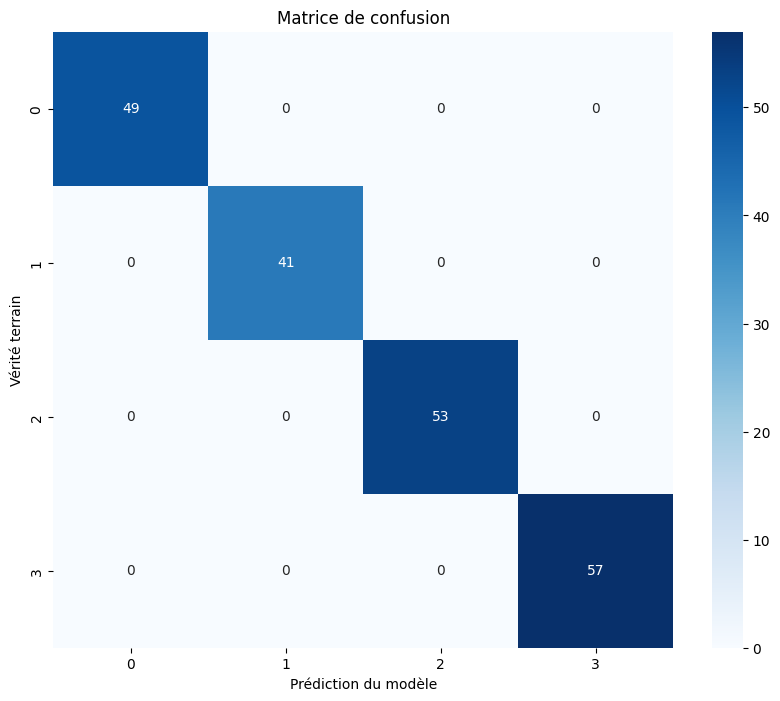

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédire les classes sur l'ensemble de test
y_pred = model.predict(x_test)
# Convertir les probabilités en prédictions de classe
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.ylabel('Vérité terrain')
plt.xlabel('Prédiction du modèle')
plt.show()

# Afficher le rapport de classification
print(classification_report(y_test, y_pred_classes))



**Précision (Precision):** Indique le pourcentage de prédictions positives correctes parmi toutes les prédictions positives. Elle est utile lorsque les coûts des faux positifs sont élevés.

**Rappel (Recall):** Indique le pourcentage d'exemples positifs correctement identifiés. C'est crucial dans les cas où les faux négatifs ont un coût élevé.

**Score F1:** Moyenne harmonique de la précision et du rappel, elle est utile pour évaluer un modèle lorsque l'équilibre entre précision et rappel est important.

**Matrice de confusion:** Permet de visualiser le nombre de vraies et de fausses prédictions pour chaque classe.

8.Tracer la (les) frontières(s) de décision pour les ensembles d’entrainement et de test.

79/79 [==============================] - 0s 2ms/step


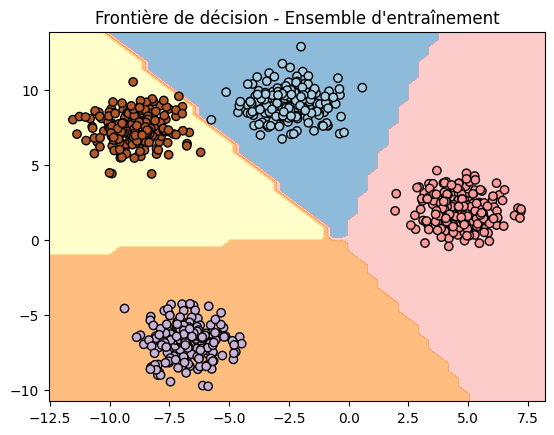

79/79 [==============================] - 0s 2ms/step


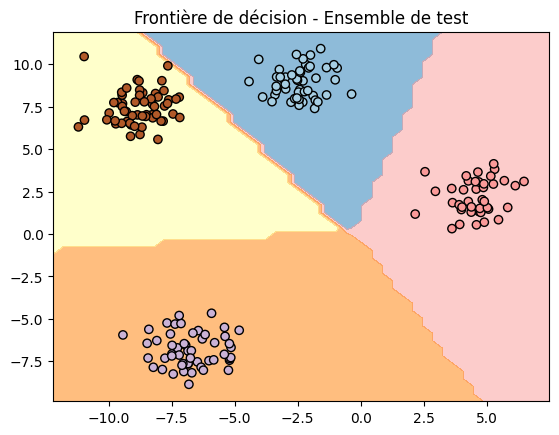

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour tracer les frontières de décision
def plot_decision_boundary(X, y, model, title):
    # Définir la limite et la grille du graphique
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)

    # Faire des prédictions sur la grille
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = np.argmax(labels, axis=1)
    z = z.reshape(xx.shape)

    # Tracer les contours et les points de données
    plt.contourf(xx, yy, z, alpha=0.5, levels=np.arange(num_classes + 1) - 0.5, cmap='Paired')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='Paired')
    plt.title(title)
    plt.show()

# Tracer les frontières de décision pour l'ensemble d'entraînement
plot_decision_boundary(x_train, y_train, model, "Frontière de décision - Ensemble d'entraînement")

# Tracer les frontières de décision pour l'ensemble de test
plot_decision_boundary(x_test, y_test, model, "Frontière de décision - Ensemble de test")


9.Etudier l’impact de l’augmentation du nombre d’échantillons dans le dataset sur
l’exactitude de classification, et afficher la courbe de la progression de l’exactitude de
classification en fonction du nombre d’échantillons dans le dataset.

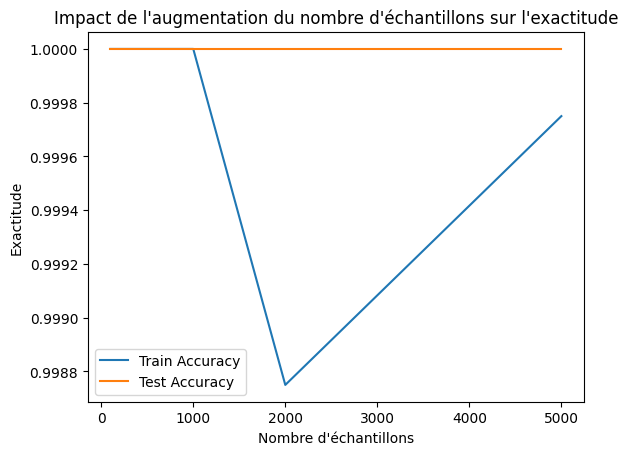

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def evaluate_accuracy_by_samples(model_func, sample_sizes, centers=4, n_features=2):
    train_accuracies = []
    test_accuracies = []

    for n_samples in sample_sizes:
        # Générer les données avec `make_blobs`
        X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=n_features, random_state=42)

        # Diviser les données en ensembles d'apprentissage et de test
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)

        # Créer et entraîner le modèle
        model = model_func()
        model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

        # Évaluer le modèle
        train_accuracy = model.evaluate(x_train, y_train, verbose=0)[1]
        test_accuracy = model.evaluate(x_test, y_test, verbose=0)[1]

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    return train_accuracies, test_accuracies

# Fonction de création du modèle
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(2,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Évaluer les performances pour différentes tailles d'échantillons
sample_sizes = [100, 200, 500, 1000, 2000, 5000]
train_accs, test_accs = evaluate_accuracy_by_samples(create_model, sample_sizes)

# Tracer les courbes d'accuracy
plt.plot(sample_sizes, train_accs, label='Train Accuracy')
plt.plot(sample_sizes, test_accs, label='Test Accuracy')
plt.xlabel('Nombre d\'échantillons')
plt.ylabel('Exactitude')
plt.title('Impact de l\'augmentation du nombre d\'échantillons sur l\'exactitude')
plt.legend()
plt.show()


**Surapprentissage (Overfitting) :** Avec un petit nombre d'échantillons, le modèle peut sur-apprendre et montrer une haute précision d'entraînement.

**Sous-apprentissage (Underfitting) :** Avec plus d'échantillons, le modèle montre une baisse de performance, indiquant un sous-apprentissage.